<img src="ucu.png" align="right"  alt="Drawing" />

# LDR and Analyzing of Ukrainian Parliament

#### Linear Algebra final project report

###### by Anastasiia Khaburska & Yarema Sirskiy

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
bill_deputy = pd.read_table("./all.csv",index_col=0, encoding="utf-8",sep=',')
deputies=bill_deputy.columns.values
deputies_fractions=list(bill_deputy.loc['fractions', : ])
len(deputies)==len(deputies_fractions)
deputies_names = pd.read_table("./plenary_deputies-skl8.csv",index_col=0, encoding="utf-8",sep=',')
deputies_names=deputies_names.drop(['sex'], axis=1)
bill_deputy=bill_deputy.drop(['fractions'])

/home/user/.pyenv/versions/3.5.6/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Fractions

<img src="pr1.png" align="center"  alt="Drawing" />

In [3]:
bill_deputy[0:10]
#bill_deputy

,2,3,4,5,6,7,8,9,10,11,...,478,479,480,481,482,483,484,485,486,487
id_event,,,,,,,,,,,,,,,,,,,,,
21429,3,4,4,4,1,4,4,4,4,4,...,4,4,3,4,4,4,0,4,4,3
21430,4,4,4,4,1,4,4,4,4,4,...,4,4,3,4,4,4,0,4,3,3
21431,1,4,1,3,3,4,1,4,4,0,...,4,1,1,1,1,1,0,1,1,1
21432,1,4,1,1,3,4,1,4,1,0,...,4,1,1,1,1,1,0,1,1,3
21433,1,4,1,1,3,1,1,4,1,0,...,4,1,1,1,1,1,0,1,1,1
21434,1,4,1,1,3,1,4,4,1,0,...,1,1,1,1,1,1,0,1,1,3
21435,4,4,1,1,3,1,4,4,1,0,...,1,1,1,1,4,1,0,4,1,1
21436,1,4,1,1,1,1,1,4,1,0,...,1,1,1,1,1,1,0,1,1,1
21437,1,4,1,4,3,4,4,4,1,0,...,1,1,1,1,1,1,0,1,1,4


In [4]:
df=bill_deputy.values
print(df.shape)
for i in range(15556):
    for j in range(467):
        if (df[i][j]==2):
           df[i][j]=-1
        elif df[i][j]==1:
           df[i][j]=1
        else: df[i][j]=0
print(df)

(15556, 467)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [5]:
df2=np.transpose(df)
df2.shape

(467, 15556)

In [6]:
num_top_bills=8

def show_clusters(a):
    top_bills = lambda t: [list(bill_deputy.index)[i] for i in np.argsort(t)[:-num_top_bills-1:-1]]
    cluster_bills = ([top_bills(t) for t in a])
    return [t for t in cluster_bills]



## NMF
https://arxiv.org/pdf/1401.5226.pdf

https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000029

<img src="nmf.png" align="center"  alt="Drawing" />

In [7]:
from sklearn import decomposition
m,n=bill_deputy.shape

In [8]:
df=bill_deputy.values
for i in range(15556):
    for j in range(467):
        if (df[i][j]==-1):
           df[i][j]=2
        #elif df2[i][j]==1:
        #   df2[i][j]=1
        #else: df2[i][j]=0
        
df2=np.transpose(df)
df2.shape

(467, 15556)

In [9]:
d=11
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(df2)
H1 = clf.components_

show_clusters(H1)

[[15342, 2406, 1155, 2407, 16779, 4542, 4282, 282],
 [1155, 58, 1135, 60, 63, 539, 85, 84],
 [3462, 6048, 14647, 7284, 7973, 3277, 16004, 7260],
 ['20250', 17398, 17397, '20247', '20323', 17396, 9855, 16610],
 [1134, 3126, 3462, 3124, 3277, 587, 696, 2831],
 [15660, 15661, 16098, 16099, '20996', 16095, 16097, '20886'],
 [3108, 2855, 3122, 2632, 2928, 12173, 2626, 3112],
 [6909, 6936, 6981, 6917, 6943, 6986, 6916, 6974],
 [3462, 6048, 4408, 10968, 10967, 226, 3929, 4414],
 [7864, 13337, 18413, 10628, 13333, 13338, '19942', 18219],
 ['20542', '19243', '19244', '19241', '19242', '19925', '19245', 14650]]

In [10]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(df)
H1 = clf.components_

print(H1.shape)
H1

(11, 467)


array([[0.05877825, 0.34881869, 1.2002317 , ..., 0.        , 0.        ,
        0.        ],
       [2.28505627, 2.83419442, 1.69621535, ..., 0.        , 0.        ,
        0.        ],
       [0.14278654, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.9240928 , 1.07744737, 0.580151  , ..., 0.        , 0.        ,
        0.        ],
       [3.82320932, 3.83485932, 2.25189886, ..., 0.13408513, 0.2262018 ,
        0.10834435]])

In [11]:
clusters=[list(H1[:,i]).index(max(H1[:,i])) for i in range(H1.shape[1])]

for i in range(len(deputies)):
    if clusters[i]==10:
        clusters[i]=2
    elif clusters[i]==2:
        clusters[i]=3
    elif clusters[i]==5:
        clusters[i]=10
    elif clusters[i]==4:
        clusters[i]=5
    elif clusters[i]==3:
        clusters[i]=4
    elif clusters[i]==8:
        clusters[i]=6
    elif clusters[i]==6:
        clusters[i]=8
    elif clusters[i]==0:
        clusters[i]=1
    elif clusters[i]==1:
        clusters[i]=0
#for i in range(len(deputies)):
    #print(deputies[i],clusters[i], deputies_fractions[i])

In [12]:
s = (11,11)
choises=np.zeros(s)
choises[0,0]
colors = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139', 'red', 'green', 'blue', 'black', 'gray', 'orange', 'yellow', 'rose']


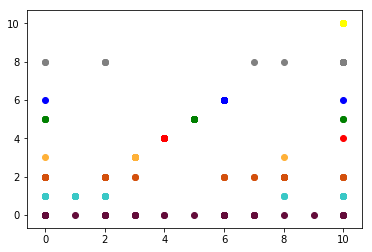

In [13]:
for i in range(467):
    x = clusters[i]
    y = deputies_fractions[i]
    choises[x,y]+=1
    plt.scatter(x, y, c=colors[int(deputies_fractions[i])])
    #if (x==0 and y==2):
    #    print(deputies_names.loc[int(bill_deputy.columns.values[i])][0],bill_deputy.columns.values[i] )
    #if int(edges.columns.values[i]) in deputies_udar['number'].values:
        #print("удар",edges.columns.values[i],clusters[i])

In [14]:
choises_=np.delete(choises, 9, 0)
choises_=np.delete(choises_, 7, 0)
choises_=np.delete(choises_, 9, 1)
choises_=np.delete(choises_, 7, 1)
print(choises_)
print(type(choises_))

[[  9.   7.  33.   1.   0.   4.   1.   2.   0.]
 [  1.  69.   0.   0.   0.   0.   0.   0.   0.]
 [  6.   7. 103.   0.   0.   0.   0.   3.   0.]
 [  5.   0.   2.  25.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.  42.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.  20.   0.   0.   0.]
 [ 11.   0.   4.   0.   0.   0.  20.   0.   0.]
 [  1.   3.  12.   1.   0.   0.   0.   1.   0.]
 [  6.   7.   5.   0.   1.   2.   1.  15.  25.]]
<class 'numpy.ndarray'>


The coincidence matrix heatmap. NMF. r=11 (cluster i - predicted cluster; fraction j - real faction id);


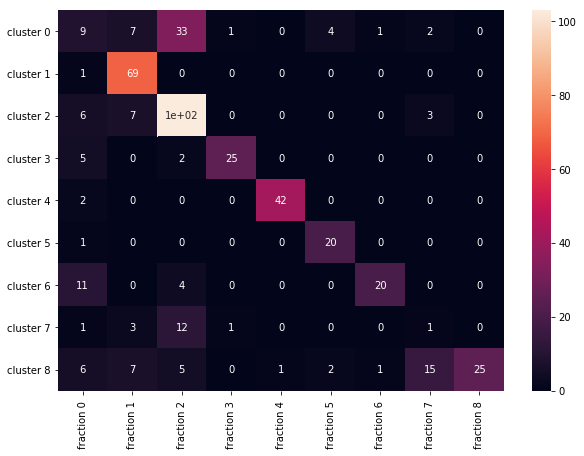

In [15]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

print("The coincidence matrix heatmap. NMF. r=11 (cluster i - predicted cluster; fraction j - real faction id);")

df_cm = pd.DataFrame(choises_, index = ['cluster '+str(i) for i in (range(9))],
                  columns = ['fraction '+str(i)+" " for i in range(9)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

<img src="pr1.png" align="center"  alt="Drawing" />

In [16]:
correct=0
for i in range(n):
    for j in range(n):
        if (clusters[i]==clusters[j] and deputies_fractions[i]==deputies_fractions[j]):
            correct+=1
        if (clusters[i]!=clusters[j] and deputies_fractions[i]!=deputies_fractions[j]):
            correct+=1
print("NMF. r=11. Rand Index:")
print(correct/(n*(n-1)))

NMF. r=11. Rand Index:
0.8622152172114952


## NMF for 9 fractions

In [17]:
clf = decomposition.NMF(n_components=9, random_state=1)

W1 = clf.fit_transform(df)
H1 = clf.components_

H1.shape

(9, 467)

In [18]:
clusters=[list(H1[:,i]).index(max(H1[:,i])) for i in range(H1.shape[1])]
for i in range(len(deputies)):
    if clusters[i]==0:
        clusters[i]=2
    elif clusters[i]==2:
        clusters[i]=3
    elif clusters[i]==3:
        clusters[i]=4
    elif clusters[i]==4:
        clusters[i]=5
    elif clusters[i]==5:
        clusters[i]=10
    elif clusters[i]==10:
        clusters[i]=0
    elif clusters[i]==8:
        clusters[i]=6
    elif clusters[i]==6:
        clusters[i]=8
#for i in range(len(deputies)):
#    print(deputies[i],clusters[i], deputies_fractions[i])

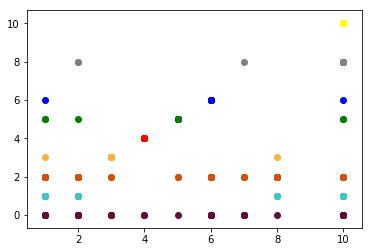

In [19]:
s = (11,11)
choises=np.zeros(s)

for i in range(n):
    x = clusters[i]
    y = deputies_fractions[i]
    choises[x,y]+=1
    plt.scatter(x, y, c=colors[int(deputies_fractions[i])])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 6.  8. 20.  1.  0.  2.  1.  0.  0.]
 [ 7. 72. 73.  0.  0.  1.  0.  2.  0.]
 [ 4.  0.  2. 25.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0. 43.  0.  0.  0.  0.]
 [ 1.  0.  2.  0.  0. 21.  0.  0.  0.]
 [11.  0. 10.  0.  0.  0. 20.  0.  0.]
 [ 1.  4. 26.  1.  0.  0.  0.  0.  0.]
 [11.  9. 25.  0.  0.  2.  1. 19. 25.]]
<class 'numpy.ndarray'>
The coincidence matrix heatmap. NMF. r=9 (cluster i - predicted cluster; fraction j - real faction id);


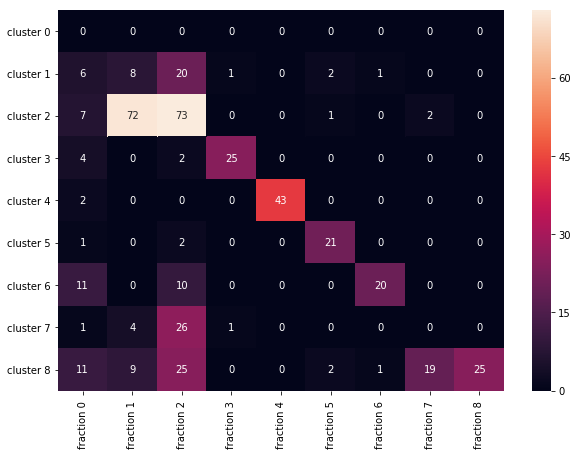

In [20]:
choises_=np.delete(choises, 9, 0)
choises_=np.delete(choises_, 7, 0)
choises_=np.delete(choises_, 9, 1)
choises_=np.delete(choises_, 7, 1)
print(choises_)
print(type(choises_))

print("The coincidence matrix heatmap. NMF. r=9 (cluster i - predicted cluster; fraction j - real faction id);")

df_cm = pd.DataFrame(choises_, index = ['cluster '+str(i) for i in range(9)],
                  columns = ['fraction '+str(i)+" " for i in range(9)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [21]:
correct=0
for i in range(n):
    for j in range(n):
        if (clusters[i]==clusters[j] and deputies_fractions[i]==deputies_fractions[j]):
            correct+=1
        if (clusters[i]!=clusters[j] and deputies_fractions[i]!=deputies_fractions[j]):
            correct+=1
print("NMF. r=9. Rand Index:")
print(correct/(n*(n-1)))

NMF. r=9. Rand Index:
0.7832709928224169


## NMF for 3 fractions

In [22]:
clf = decomposition.NMF(n_components=3, random_state=1)

W1 = clf.fit_transform(df)
H1 = clf.components_

clusters=[list(H1[:,i]).index(max(H1[:,i])) for i in range(H1.shape[1])]

[[ 14.  69. 107.   0.  38.  13.   0.  13.  20.]
 [ 16.  22.  35.   1.   4.  12.   3.   7.   5.]
 [ 18.   2.  19.  26.   1.   1.  19.   2.   0.]]


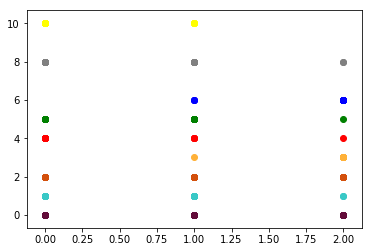

In [23]:
s = (3,11)
choises=np.zeros(s)

for i in range(n):
    x = clusters[i]
    y = deputies_fractions[i]
    choises[x,y]+=1
    plt.scatter(x, y, c=colors[int(deputies_fractions[i])])

choises_=np.delete(choises, 9, 1)
choises_=np.delete(choises_, 7, 1)
print(choises_)

In [24]:
print("The coincidence matrix heatmap. NMF. r=3 (cluster i - predicted cluster; fraction j - real faction id);")


The coincidence matrix heatmap. NMF. r=3 (cluster i - predicted cluster; fraction j - real faction id);


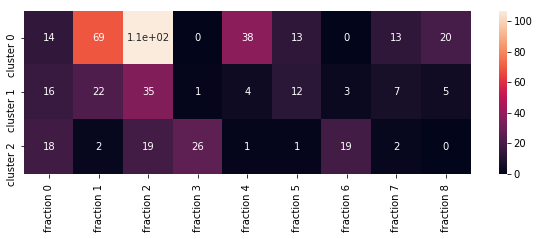

In [25]:
df_cm = pd.DataFrame(choises_, index = ['cluster '+str(i) for i in range(3)],
                  columns = ['fraction '+str(i)+" " for i in range(9)])
plt.figure(figsize = (10,3))
sn.heatmap(df_cm, annot=True)

In [26]:
correct=0
for i in range(n):
    for j in range(n):
        if (clusters[i]==clusters[j] and deputies_fractions[i]==deputies_fractions[j]):
            correct+=1
        if (clusters[i]!=clusters[j] and deputies_fractions[i]!=deputies_fractions[j]):
            correct+=1
print("NMF. r=3. Rand Index:")
print(correct/(n*(n-1)))

NMF. r=3. Rand Index:
0.5862504710001746


## PCA
http://cs229.stanford.edu/notes/cs229-notes10.pdf
    

In [27]:
bill_deputy = pd.read_table("./all.csv",index_col=0, encoding="utf-8",sep=',')
bill_deputy = bill_deputy.drop(['fractions'])
   

/home/user/.pyenv/versions/3.5.6/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
df_pca=bill_deputy.values
for i in range(15556):
    for j in range(n):
        if (df_pca[i][j]==2):
            df_pca[i][j]=-1
        elif df_pca[i][j]==1:
            df_pca[i][j]=1
        else: df_pca[i][j]=0
print(df_pca.shape)
df_pca

(15556, 467)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [29]:
row_means = np.mean(df_pca, axis=0)
print("\nZero-mean matrix:")
df_pca_normalized = df_pca - row_means
df_pca_normalized


Zero-mean matrix:


array([[-0.54769864, -0.59346876, -0.57321934, ..., -0.01799949,
        -0.04204166, -0.01054256],
       [-0.54769864, -0.59346876, -0.57321934, ..., -0.01799949,
        -0.04204166, -0.01054256],
       [ 0.45230136, -0.59346876,  0.42678066, ...,  0.98200051,
         0.95795834,  0.98945744],
       ...,
       [ 0.45230136,  0.40653124,  0.42678066, ..., -0.01799949,
        -0.04204166, -0.01054256],
       [ 0.45230136,  0.40653124,  0.42678066, ..., -0.01799949,
        -0.04204166, -0.01054256],
       [ 0.45230136,  0.40653124,  0.42678066, ..., -0.01799949,
        -0.04204166, -0.01054256]])

In [30]:
C=np.matrix(df_pca_normalized).transpose()*np.matrix(df_pca_normalized)
print(C.shape)
print("Empirical covariance matrix :")
C

(467, 467)
Empirical covariance matrix :


matrix([[3875.60761121, 1752.64618154, 1073.17125225, ...,   59.64438159,
           61.80509128,   44.1774235 ],
        [1752.64618154, 3951.09642582, 1156.0390846 , ...,  -19.17125225,
          -27.12856776,  -17.32887632],
        [1073.17125225, 1156.0390846 , 3877.60317562, ...,   83.49858575,
           70.11455387,   38.9920288 ],
        ...,
        [  59.64438159,  -19.17125225,   83.49858575, ...,  300.960144  ,
          249.22833633,  114.04808434],
        [  61.80509128,  -27.12856776,   70.11455387, ...,  249.22833633,
          656.50475701,  157.10516842],
        [  44.1774235 ,  -17.32887632,   38.9920288 , ...,  114.04808434,
          157.10516842,  188.27102083]])

In [31]:
from numpy import linalg as LA

w, v = LA.eig(C)
print("Eigenvalues:")
print(w[0:40])
print("Eigenvectors:")
print(v)

Eigenvalues:
[275933.72872228  80519.05527416  54856.3805157   43478.52442308
  29715.64552926  22498.57114215  15102.66764085  14545.02952342
  13076.54526706  11540.15543275  10879.82545817  10306.5667732
   8877.08385538   8465.70053447   7686.89994644   7385.73276224
   7146.63083609   6870.32599848   6820.99473125   6468.9306356
   6218.26516142   6073.04218613   6005.64981988   5729.77441812
   5620.22069648   5498.28899894   5445.53613052   5351.48680301
   5231.71965025   5149.13112313   5110.8939735    5022.05731887
   4918.9395288    4885.02648794   4826.12138512   4708.55489545
   4659.23711613   4618.84080639   4552.57508256   4498.41960535]
Eigenvectors:
[[ 0.06864691  0.01396696 -0.02517853 ...  0.00842258  0.00640981
   0.00817381]
 [ 0.08090768  0.02340621  0.00450904 ...  0.01286883 -0.09324044
   0.03033991]
 [ 0.05500868  0.02608918 -0.0064855  ...  0.00460768  0.00129636
   0.04888784]
 ...
 [ 0.0017828   0.00320455 -0.00795783 ...  0.01239602  0.00248064
  -0.01245

In [32]:
s = (15556,)
Y1=np.zeros(s)
print(Y1.shape)

(15556,)


In [33]:
for i in range(len(deputies)):
    Y1+=v[0,i]*df_pca_normalized[:,i]
#print(Y1)
Y2=np.zeros(s)
for i in range(len(deputies)):
    Y2+=v[1,i]*df_pca_normalized[:,i]
#print(Y2)
print("The variance along the first component")
print(np.std(Y1))
print("The variance along the second component")
print(np.std(Y2))

The variance along the first component
0.6131148329331308
The variance along the second component
0.38882807295698424


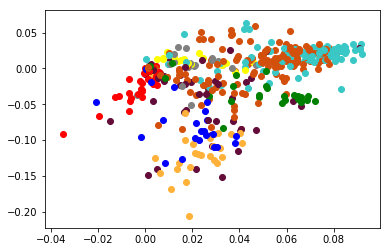

In [34]:
colors = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139', 'red', 'green', 'blue', 'black', 'gray', 'orange', 'yellow', 'rose']
for i in range(len(deputies)):
    x = v[i,0]
    y = v[i,1]
    plt.scatter(x, y, c=colors[int(deputies_fractions[i])])

In [35]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import plotly 
plotly.tools.set_credentials_file(username='anastasykhab', api_key='1A5tXzke659VuNNyl0YF')
import plotly.plotly as py
import plotly.graph_objs as go

x, y, z = (v[:,0], v[:,1], v[:,2])
s=(len(deputies), 1 )
c=np.zeros(s)
for i in range(len(deputies)):
    c[i,0]=int(deputies_fractions[i])
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=c, 
        colorbar=dict(
                title='Colorbar'
            ),# set color to an array/list of desired values
        colorscale=[[0,'#e6194b'], [0.1,'#3cb44b'], [0.2, '#ffe119'], [0.3,'#4363d8'], [0.4,'#f58231'], 
                    [0.5,'#911eb4'], [0.6, '#46f0f0'], [0.7, '#f032e6'], [0.8,'#bcf60c'], 
                    [0.9, '#fabebe'],[1,'#008080']],  # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [36]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(df_pca_normalized)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.n_components = 3
df_pca_reduced = pca.fit_transform(df_pca_normalized)
df_pca_reduced

array([[ 7.69877053,  1.24879449, -0.51430839],
       [ 7.4718291 ,  2.95074823,  1.13844583],
       [ 0.79576579, -0.50485612, -1.36072213],
       ...,
       [-6.92106776, -2.92898264,  2.64179866],
       [-6.69503129, -2.75546864,  3.11244054],
       [-6.81120402, -4.16747654,  1.9461669 ]])

<img src="pca.png" align="center"  alt="Drawing" />

In [38]:
clusters_pca=np.zeros((len(deputies),1))
for dep in range(len(deputies)):
    #print("_________________________________________________________________")
    i=0
    error=np.sqrt(sum((df_pca_reduced[:,0]-df_pca_normalized[:,dep])**2)/(467*w[0]))
    for j in range(3):
        error_j=np.sqrt(sum((df_pca_reduced[:,j]-df_pca_normalized[:,dep])**2)/(467*w[j]))
        if (error_j<error):
            i=j
            error=error_j
    clusters_pca[dep,0]=i      

clusters_pca

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],

[[19.  0. 16. 20. 40.  0.  9.  3.  1.]
 [ 7. 65. 99.  0.  3.  3.  0. 14. 23.]
 [22. 28. 46.  7.  0. 23. 13.  5.  1.]]


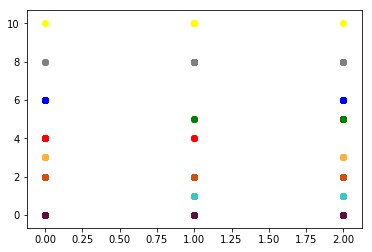

In [39]:
s = (3,11)
choises_pca=np.zeros(s)
choises_pca[0,0]
for i in range(n):
    x = int(clusters_pca[i])
    y = deputies_fractions[i]
    choises_pca[x,y]+=1
    plt.scatter(x, y, c=colors[int(deputies_fractions[i])])
choises_=np.delete(choises_pca, 9, 1)
choises_=np.delete(choises_, 7, 1)
print(choises_)

In [40]:
print("The coincidence matrix heatmap. PCA. r=3 (cluster i - predicted cluster; fraction j - real faction id);")


The coincidence matrix heatmap. PCA. r=3 (cluster i - predicted cluster; fraction j - real faction id);


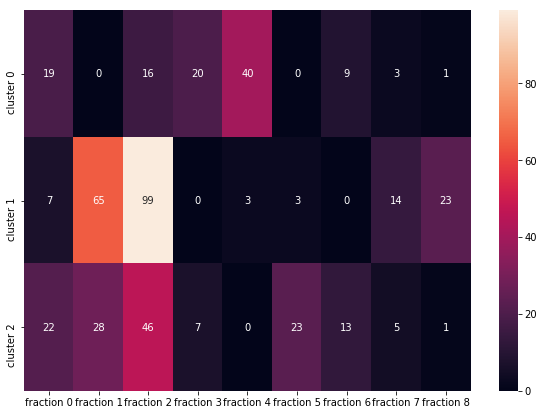

In [41]:
df_pca_cm = pd.DataFrame(choises_, index = ['cluster '+str(i) for i in range(3)],
                  columns = ['fraction '+str(i) for i in range(9)])
plt.figure(figsize = (10,7))
sn.heatmap(df_pca_cm, annot=True)

<img src="pr1.png" align="center"  alt="Drawing" />

In [42]:
correct=0
for i in range(n):
    for j in range(n):
        if (clusters_pca[i]==clusters_pca[j] and deputies_fractions[i]==deputies_fractions[j]):
            correct+=1
        if (clusters_pca[i]!=clusters_pca[j] and deputies_fractions[i]!=deputies_fractions[j]):
            correct+=1

print("PCA. r=3. Rand Index:")
print(correct/(n*(n-1)))

PCA. r=3. Rand Index:
0.6490566211136741


### PCA for 9 clusters

In [43]:
pca.n_components = 9
df_pca_reduced = pca.fit_transform(df_pca_normalized)
df_pca_reduced.shape

(15556, 9)

In [44]:
clusters_pca=np.zeros((len(deputies),1))
for dep in range(len(deputies)):
    #print("_________________________________________________________________")
    i=0
    error=np.sqrt(sum((df_pca_reduced[:,0]-df_pca_normalized[:,dep])**2)/(467*w[0]))
    for j in range(9):
        error_j=np.sqrt(sum((df_pca_reduced[:,j]-df_pca_normalized[:,dep])**2)/(467*w[j]))
        if (error_j<error):
            i=j
            error=error_j
            #print(error)
            #print(i)
    clusters_pca[dep,0]=i   

0
1
2
1
1
2
2
1
2
3
1
2
4
1
2
5
1
2
6
1
2
7
1
2
8
2
1
9
3
8
10
3
8
11
1
1
12
3
8
13
3
0
14
1
2
15
0
0
16
1
2
17
3
0
18
3
0
19
3
4
20
1
2
21
2
1
22
3
10
23
3
4
24
4
0
25
3
0
26
3
4
27
3
0
28
3
4
29
1
2
30
3
4
31
8
10
32
8
10
33
3
2
34
3
4
35
3
0
36
1
2
37
2
2
38
1
2
39
3
8
40
1
1
41
3
10
42
2
2
43
0
0
44
8
10
45
0
0
46
1
8
47
2
0
48
2
2
49
1
2
50
1
2
51
1
8
52
3
8
53
3
8
54
3
4
55
1
2
56
2
2
57
2
0
58
1
2
59
1
1
60
2
0
61
5
1
62
0
2
63
6
0
64
1
2
65
2
8
66
2
1
67
1
1
68
3
8
69
4
2
70
3
0
71
1
2
72
3
8
73
3
8
74
1
2
75
3
4
76
3
4
77
3
4
78
2
2
79
2
0
80
1
2
81
5
1
82
1
2
83
2
0
84
2
0
85
2
0
86
0
0
87
1
2
88
1
2
89
1
2
90
3
10
91
2
2
92
1
2
93
1
2
94
2
2
95
1
2
96
3
4
97
2
2
98
8
10
99
8
10
100
3
10
101
3
10
102
3
10
103
1
2
104
3
2
105
8
2
106
3
10
107
3
10
108
2
2
109
1
1
110
4
0
111
6
0
112
1
1
113
1
2
114
1
2
115
0
6
116
1
1
117
2
2
118
3
0
119
3
8
120
1
2
121
2
6
122
6
0
123
1
2
124
1
2
125
1
2
126
8
10
127
1
1
128
3
10
129
8
10
130
3
10
131
3
0
132
3
10
133
3
4
134
3
10
135
3
4
136

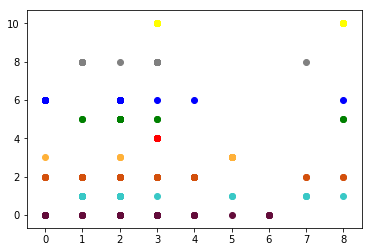

In [45]:
s = (9,11)
choises_pca=np.zeros(s)
for i in range(n):
    print(i)
    x = int(clusters_pca[i])
    y = deputies_fractions[i]
    print(x)
    print(y)
    choises_pca[x,y]+=1
    plt.scatter(x, y, c=colors[int(deputies_fractions[i])])  
    
choises_=np.delete(choises_pca, 9, 1)
choises_=np.delete(choises_, 7, 1)
print(choises_)

In [46]:
print("The coincidence matrix heatmap. PCA. r=9 (cluster i - predicted cluster; fraction j - real faction id);")


The coincidence matrix heatmap. PCA. r=9 (cluster i - predicted cluster; fraction j - real faction id);


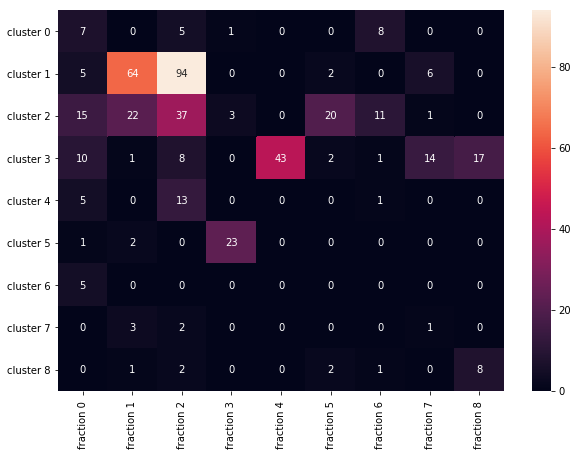

In [47]:
df_pca_cm = pd.DataFrame(choises_, index = ['cluster '+str(i) for i in range(9)],
                  columns = ['fraction '+str(i)+" " for i in range(9)])
plt.figure(figsize = (10,7))
sn.heatmap(df_pca_cm, annot=True)

In [48]:
correct=0
for i in range(n):
    for j in range(n):
        if (clusters_pca[i]==clusters_pca[j] and deputies_fractions[i]==deputies_fractions[j]):
            correct+=1
        if (clusters_pca[i]!=clusters_pca[j] and deputies_fractions[i]!=deputies_fractions[j]):
            correct+=1
print("PCA. r=9. Rand Index:")

print(correct/(n*(n-1)))

PCA. r=9. Rand Index:
0.746601906057292
